<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/Binaryclassificationofiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Problem 1 Select features and categories for practice

from sklearn.datasets import load_iris
import pandas as pd

# Loading iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Adding target names for clarity
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Filtering for versicolor (1) and virginica (2)
df_binary = df[df['target'].isin([1, 2])]

# Selecting only sepal length and petal length
features = ['sepal length (cm)', 'petal length (cm)']
X_binary = df_binary[features].values
y_binary = df_binary['target'].values

print(df_binary.head())


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target target_name  
50       1  versicolor  
51       1  versicolor  
52       1  versicolor  
53       1  versicolor  
54       1  versicolor  


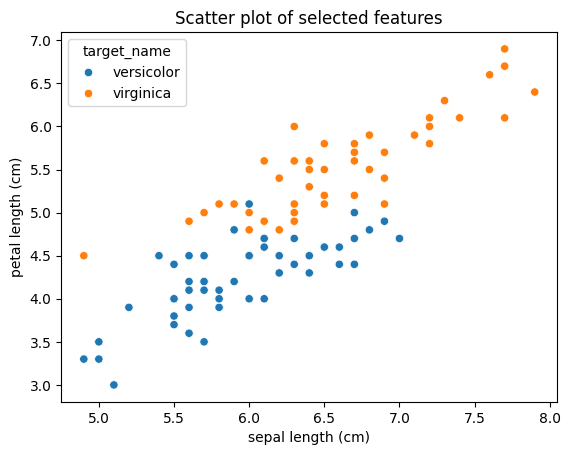

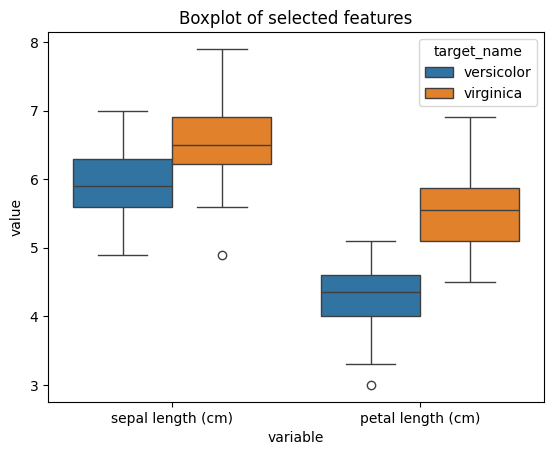

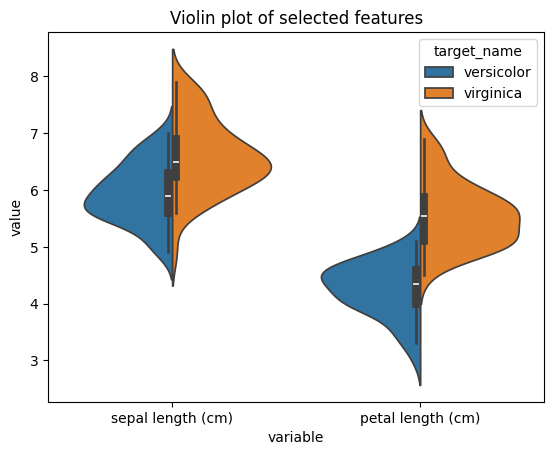

In [2]:
# Problem 2: Data analysis using scatter plot, boxplot, violinplot

import seaborn as sns
import matplotlib.pyplot as plt

# Reset index for Seaborn compatibility
df_binary = df_binary.reset_index(drop=True)

# Scatter plot
sns.scatterplot(
    data=df_binary,
    x='sepal length (cm)',
    y='petal length (cm)',
    hue='target_name'
)
plt.title("Scatter plot of selected features")
plt.show()

# Boxplot
df_melt = df_binary.melt(id_vars=['target_name'], value_vars=features)
sns.boxplot(data=df_melt, x='variable', y='value', hue='target_name')
plt.title("Boxplot of selected features")
plt.show()

# Violin plot
sns.violinplot(data=df_melt, x='variable', y='value', hue='target_name', split=True)
plt.title("Violin plot of selected features")
plt.show()


In [4]:
# Problem 3: Division of preprocessing/training data and verification data

from sklearn.model_selection import train_test_split

# X and y as ndarray
X = df_binary[['sepal length (cm)', 'petal length (cm)']].values
y = df_binary['target_name'].map({'versicolor': 0, 'virginica': 1}).values

# 75% train, 25% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")


Train shape: (75, 2)
Validation shape: (25, 2)


In [5]:
# Problem 4: Pretreatment/Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # fit only on training

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Means (should be near zero):", X_train_scaled.mean(axis=0))
print("Stds (should be near 1):", X_train_scaled.std(axis=0))


Means (should be near zero): [2.12274642e-15 1.63128770e-15]
Stds (should be near 1): [1. 1.]


In [10]:
# Problem 5: Learning and estimation using k-NN training and prediction

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Split data (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.25, random_state=42, stratify=y_binary)

# Standardize
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train k-NN (try k=1, 3, 5)
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_1.fit(X_train_std, y_train)
knn_3.fit(X_train_std, y_train)
knn_5.fit(X_train_std, y_train)

# Predict on validation data
y_pred_1 = knn_1.predict(X_test_std)
y_pred_3 = knn_3.predict(X_test_std)
y_pred_5 = knn_5.predict(X_test_std)


# Printing model parameters
print("=== Model Parameters ===")
print(f"k=1: {knn_1.get_params()}")
print(f"k=3: {knn_3.get_params()}")
print(f"k=5: {knn_5.get_params()}")

# Printing first few predictions for each k
print("\n=== Example Predictions ===")
print(f"First 10 predictions with k=1: {y_pred_1[:10]}")
print(f"First 10 predictions with k=3: {y_pred_3[:10]}")
print(f"First 10 predictions with k=5: {y_pred_5[:10]}")

# Showing the true labels for comparison
print("\nTrue labels for first 10 test samples:", y_test[:10])


=== Model Parameters ===
k=1: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
k=3: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
k=5: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

=== Example Predictions ===
First 10 predictions with k=1: [2 2 1 1 2 2 1 2 1 2]
First 10 predictions with k=3: [2 2 1 1 2 2 2 2 2 2]
First 10 predictions with k=5: [2 2 1 1 2 2 1 2 2 2]

True labels for first 10 test samples: [2 2 2 1 2 2 1 2 2 2]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=1)
    rec = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    cm = confusion_matrix(y_true, y_pred)
    print(f"=== {model_name} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")
    print(f"Confusion Matrix:\n{cm}\n")
    return acc, prec, rec, f1

# Evaluate each k-NN
evaluate(y_test, y_pred_1, "1-NN")
evaluate(y_test, y_pred_3, "3-NN")
evaluate(y_test, y_pred_5, "5-NN")


=== 1-NN ===
Accuracy : 0.840
Precision: 0.846
Recall   : 0.846
F1 Score : 0.846
Confusion Matrix:
[[11  2]
 [ 2 10]]

=== 3-NN ===
Accuracy : 0.800
Precision: 0.900
Recall   : 0.692
F1 Score : 0.783
Confusion Matrix:
[[ 9  4]
 [ 1 11]]

=== 5-NN ===
Accuracy : 0.840
Precision: 0.909
Recall   : 0.769
F1 Score : 0.833
Confusion Matrix:
[[10  3]
 [ 1 11]]



(0.84, 0.9090909090909091, 0.7692307692307693, 0.8333333333333334)

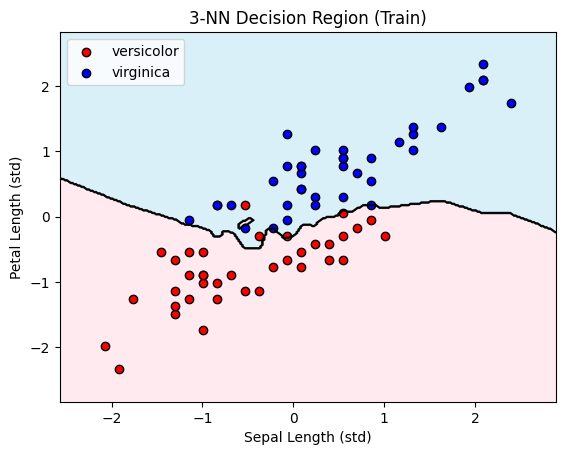

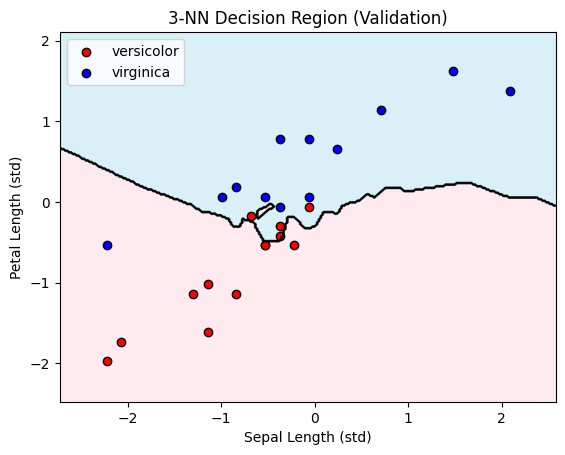

In [19]:
# Problem 7: Visualization

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.02, title="", xlabel="", ylabel="", target_names=["versicolor","virginica"]):
    scatter_color = ["red", "blue"]
    contourf_color = ["pink", "skyblue"]
    n_class = 2

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, step),
        np.arange(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, step)
    )
    mesh = np.c_[mesh_f0.ravel(), mesh_f1.ravel()]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, alpha=0.3, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors="k", linewidths=1, alpha=0.5)
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1], c=scatter_color[i], label=target_names[i], edgecolor='k')
    plt.legend()
    plt.show()

# Example with k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

decision_region(X_train_scaled, y_train, model, title="3-NN Decision Region (Train)", xlabel="Sepal Length (std)", ylabel="Petal Length (std)")
decision_region(X_val_scaled, y_val, model, title="3-NN Decision Region (Validation)", xlabel="Sepal Length (std)", ylabel="Petal Length (std)")



== KNN ==


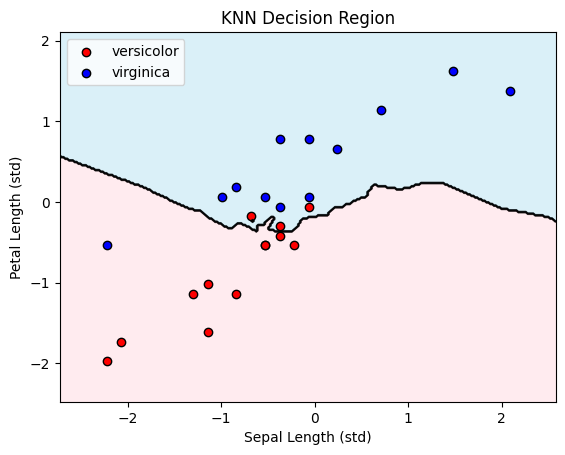


== LogisticRegression ==


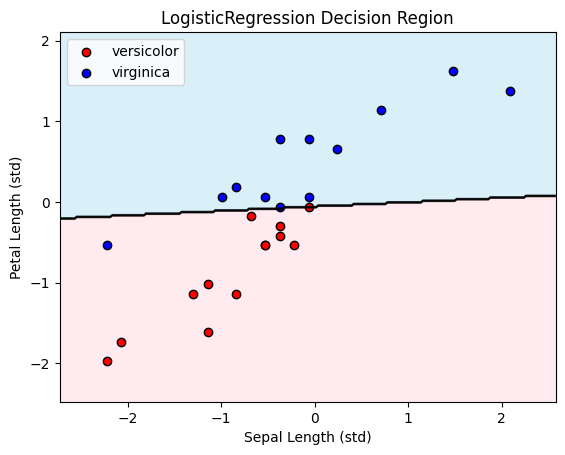


== SVM ==


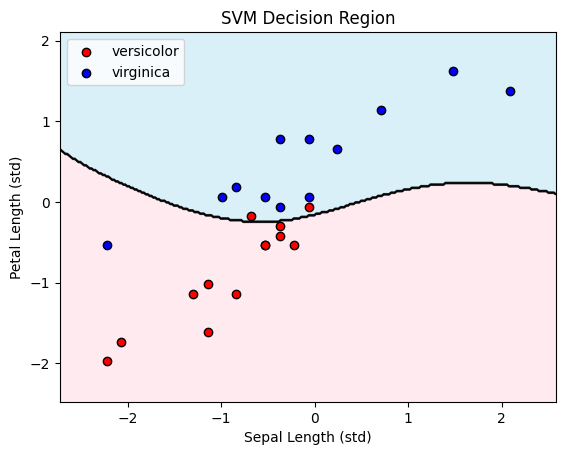


== DecisionTree ==


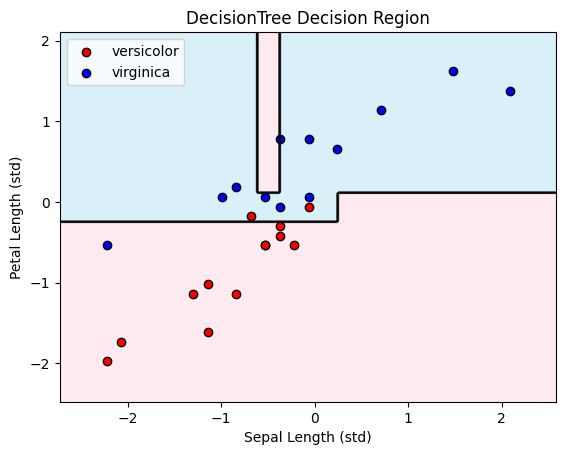


== RandomForest ==


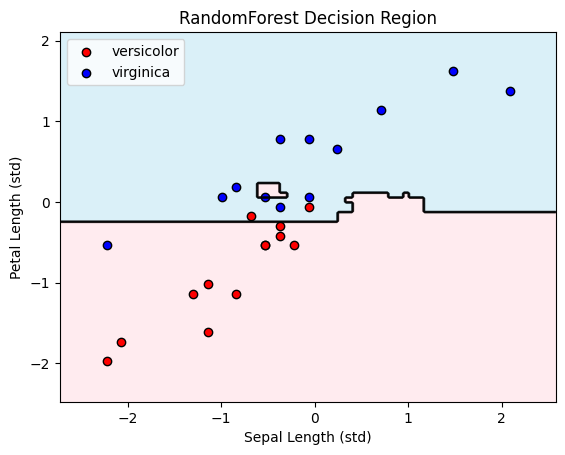

               Method  Accuracy  Precision    Recall        F1
0                 KNN      0.04   0.030303  0.027778  0.028986
1  LogisticRegression      0.04   0.025641  0.027778  0.026667
2                 SVM      0.04   0.027778  0.027778  0.027778
3        DecisionTree      0.08   0.051282  0.055556  0.053333
4        RandomForest      0.04   0.027778  0.027778  0.027778


In [31]:
# Problem 8: Learning by other methods

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

results = []

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_val, y_pred, average='macro', zero_division=0)
    f1   = f1_score(y_val, y_pred, average='macro', zero_division=0)
    results.append([name, acc, prec, rec, f1])
    print(f"\n== {name} ==")
    decision_region(X_val_scaled, y_val, clf, title=f"{name} Decision Region", xlabel="Sepal Length (std)", ylabel="Petal Length (std)")

# Making results table
df_results = pd.DataFrame(results, columns=["Method", "Accuracy", "Precision", "Recall", "F1"])
print(df_results)


In [32]:
# Problem 9: (Advanced task) Comparison with and without standardization

results_no_scaling = []

for name, clf in models.items():
    clf.fit(X_train, y_train)  # NO SCALING
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_val, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_val, y_pred, average='macro', zero_division=0)
    results_no_scaling.append([name, acc, prec, rec, f1])

df_no_scaling = pd.DataFrame(results_no_scaling, columns=["Method", "Accuracy", "Precision", "Recall", "F1"])
print("\n== With Scaling ==\n", df_results)
print("\n== Without Scaling ==\n", df_no_scaling)



== With Scaling ==
                Method  Accuracy  Precision    Recall        F1
0                 KNN      0.04   0.030303  0.027778  0.028986
1  LogisticRegression      0.04   0.025641  0.027778  0.026667
2                 SVM      0.04   0.027778  0.027778  0.027778
3        DecisionTree      0.08   0.051282  0.055556  0.053333
4        RandomForest      0.04   0.027778  0.027778  0.027778

== Without Scaling ==
                Method  Accuracy  Precision    Recall        F1
0                 KNN      0.04   0.030303  0.027778  0.028986
1  LogisticRegression      0.04   0.023810  0.027778  0.025641
2                 SVM      0.04   0.027778  0.027778  0.027778
3        DecisionTree      0.08   0.051282  0.055556  0.053333
4        RandomForest      0.08   0.051282  0.055556  0.053333


**Discussion:**  
- Standardization is a preprocessing step which simply standardizes each feature such that it has a mean of zero and has a standard deviation of one. This brings in the assurance that all features carry equal importance when models calculate distances or drawing decision boundaries.
  
- Models like KNN, SVM, and Logistic Regression rely on distance calculations or linear hyperplanes and therefore assume that input features are on the same scale. Without standardization, features with larger scales dominate, leading to poor performance.

- Tree-based models, including Decision Trees and Random Forests, however, are not sensitive to feature scaling since they partition data on features based on threshold instead of distance. This means that their performance is quite alike regardless of using standardization.

In [28]:

# Problem 10: (Advance assignment) Highly accurate method using all objective variables

X_all = df[iris.feature_names].values
y_all = df['target_name'].values

X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(
    X_all, y_all, test_size=0.25, random_state=42, stratify=y_all
)

scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_val_all_scaled = scaler_all.transform(X_val_all)

from sklearn.metrics import classification_report

print("== Multi-class classification ==")
for name, clf in models.items():
    clf.fit(X_train_all_scaled, y_train_all)
    y_pred_all = clf.predict(X_val_all_scaled)
    print(f"\n== {name} ==")
    print(classification_report(y_val_all, y_pred_all, target_names=iris.target_names))


== Multi-class classification ==

== KNN ==
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38


== LogisticRegression ==
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38


== SVM ==
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      0.92      0.92     